In [121]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    accuracy_score,
)
from imblearn.over_sampling import SMOTE


# Load data

In [122]:
data = pd.read_csv("daily_food_nutrition_dataset.csv")


In [123]:
data.shape

(10000, 14)

In [124]:
data.head(10)

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471
5,2024-01-19,620,Oats,Grains,387,31.2,6.8,39.5,5.1,0.7,300,244,Dinner,727
6,2024-07-27,714,Carrot,Vegetables,138,28.2,12.4,20.2,2.8,37.8,933,15,Dinner,733
7,2024-10-21,992,Cookies,Snacks,69,36.8,17.8,15.0,9.6,36.4,185,228,Snack,386
8,2024-07-23,535,Apple,Fruits,568,6.7,7.0,23.4,6.4,46.9,336,129,Breakfast,931
9,2024-09-08,594,Quinoa,Grains,204,19.3,62.7,31.8,6.8,40.3,887,135,Snack,662


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [126]:
data.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [127]:
data.isnull().sum()

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

# EDA

<Axes: title={'center': 'Food Items'}, xlabel='Food_Item'>

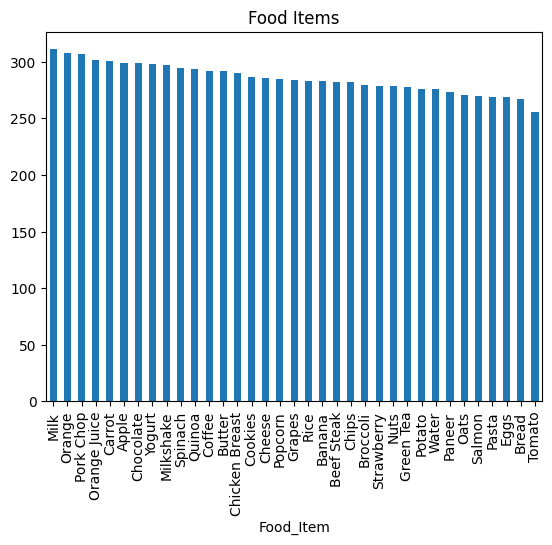

In [128]:
data['Food_Item'].value_counts().plot(kind='bar', title='Food Items')


<Axes: title={'center': 'Category'}, xlabel='Category'>

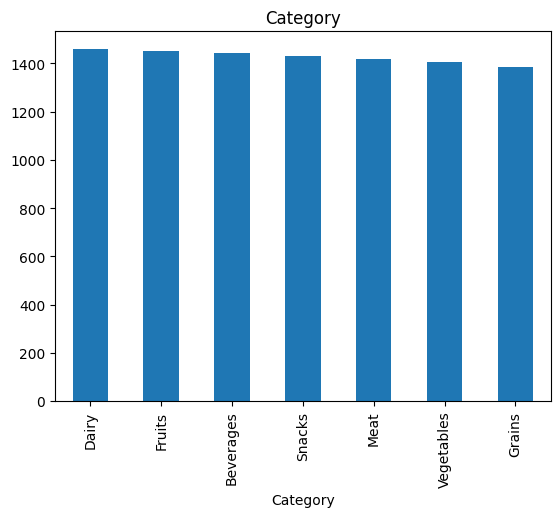

In [129]:
data['Category'].value_counts().plot(kind='bar', title='Category')

<Axes: title={'center': 'Meal Type'}, xlabel='Meal_Type'>

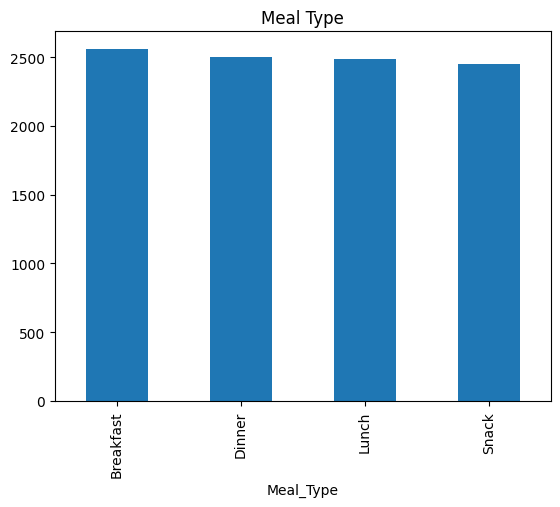

In [130]:
data['Meal_Type'].value_counts().plot(kind='bar', title='Meal Type')

In [131]:
thresholds = {
    'Calories (kcal)':    {'low': 250,  'high': 500},    # kcal
    'Fat (g)':             {'low': 3,    'high': 17.5},   # g
    'Sugars (g)':          {'low': 5,    'high': 22.5},   # g
    'Sodium (mg)':         {'low': 300,  'high': 1500},   # mg
    'Cholesterol (mg)':    {'low': 20,   'high': 60},     # mg
  
}

def cat_nutrient(value, nutrient):
    low, high = thresholds[nutrient]['low'], thresholds[nutrient]['high']
    if value <= low:
        return 'low'
    if value >= high:
        return 'high'
    return 'medium'

def assign_nutrition_label(row):
    cats = [
        cat_nutrient(row['Calories (kcal)'], 'Calories (kcal)'),
        cat_nutrient(row['Fat (g)'],        'Fat (g)'),
        cat_nutrient(row['Sugars (g)'],     'Sugars (g)'),
        cat_nutrient(row['Sodium (mg)'],    'Sodium (mg)'),
        cat_nutrient(row['Cholesterol (mg)'],'Cholesterol (mg)')
    ]
    if 'high' in cats:
        return 'unhealthy'
    if all(c == 'low' for c in cats):
        return 'healthy'
    return 'moderate'

# 5. Apply and check
data['Nutrition_Label'] = data.apply(assign_nutrition_label, axis=1)
print(data['Nutrition_Label'].value_counts())


Nutrition_Label
unhealthy    9766
moderate      234
Name: count, dtype: int64


In [132]:
data.drop(columns=['Food_Item', 'Category', 'Meal_Type','Date','User_ID','Water_Intake (ml) '], errors='ignore', inplace=True)

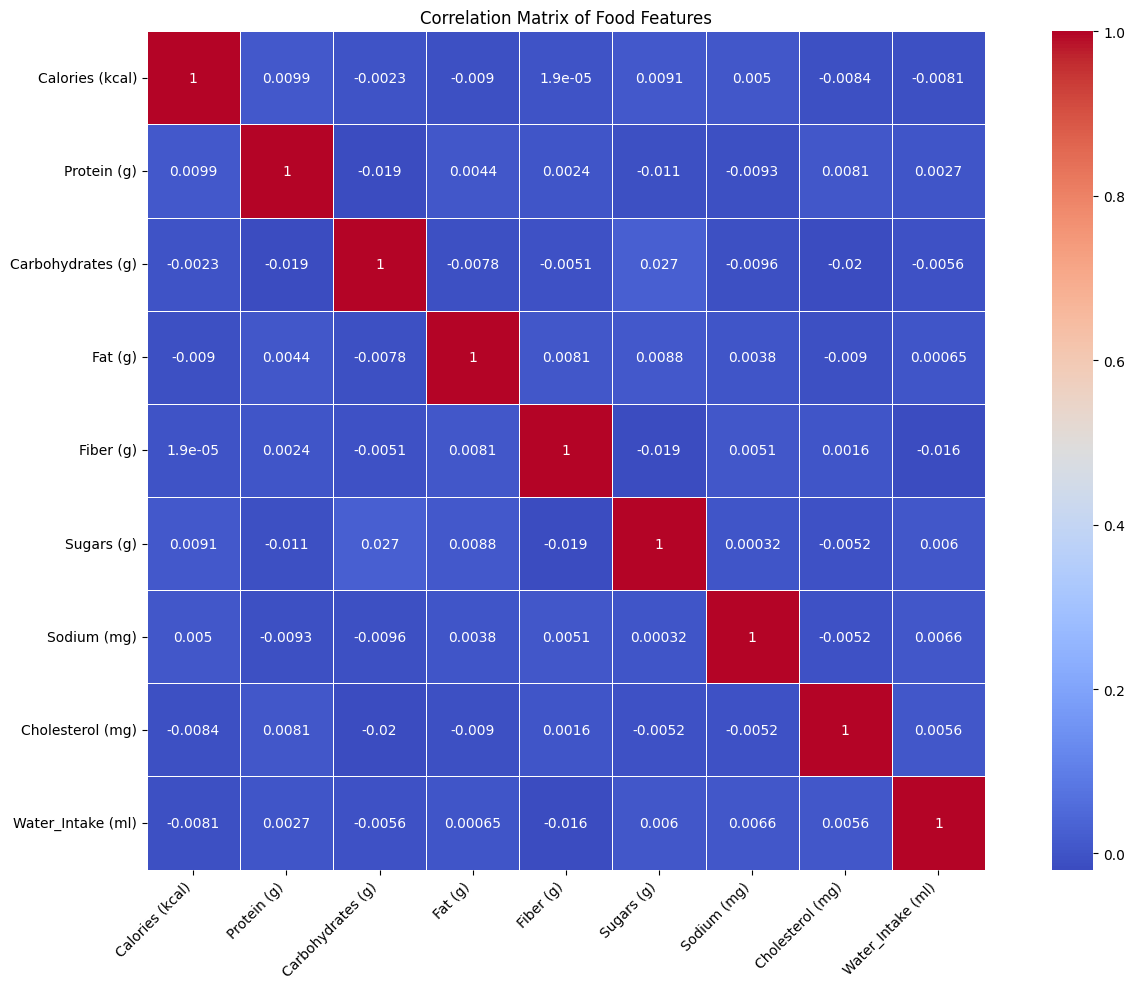

In [153]:
# Correlation Matrix
numeric_df = data.drop(columns='Nutrition_Label')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True,  cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Food Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [134]:
data['Nutrition_Label'].value_counts(normalize=True)

Nutrition_Label
unhealthy    0.9766
moderate     0.0234
Name: proportion, dtype: float64

<Axes: xlabel='Nutrition_Label'>

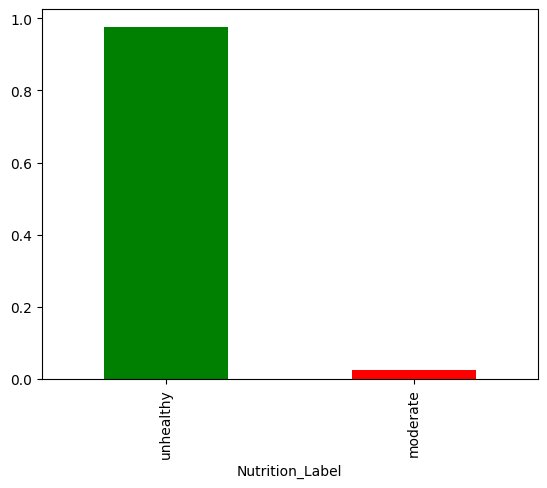

In [135]:
data['Nutrition_Label'].value_counts(normalize=True).plot.bar(color=['green','red'])

# Target Encoding


In [136]:
X=data.drop(columns='Nutrition_Label')
y=data['Nutrition_Label']

In [137]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

In [138]:
label_mapping=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
print("nutri",label_mapping)

nutri {'moderate': np.int64(0), 'unhealthy': np.int64(1)}


Data Splitting

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=41, stratify=y_encoded)

In [140]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Preprocessing Pipeline

In [141]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test)

In [142]:
print(f"Training dataset shape, X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (15626, 9), y_train: (8000,)


In [143]:
print(f"Testing dataset shape, X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2000, 9), y_test: (2000,)


# Multinomial Logistic Regression

1. Without Regularization

In [144]:
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
clf.fit(X_train_scaled, y_train_res)
# predcitions
y_pred = clf.predict(X_test_scaled)

c:\Users\Adio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [145]:
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, labels=clf.classes_
)
print("Overall accuracy:", acc)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 per class:", f1)

Overall accuracy: 0.947
Precision per class: [0.30463576 0.99945917]
Recall per class: [0.9787234  0.94623656]
F1 per class: [0.46464646 0.97211994]


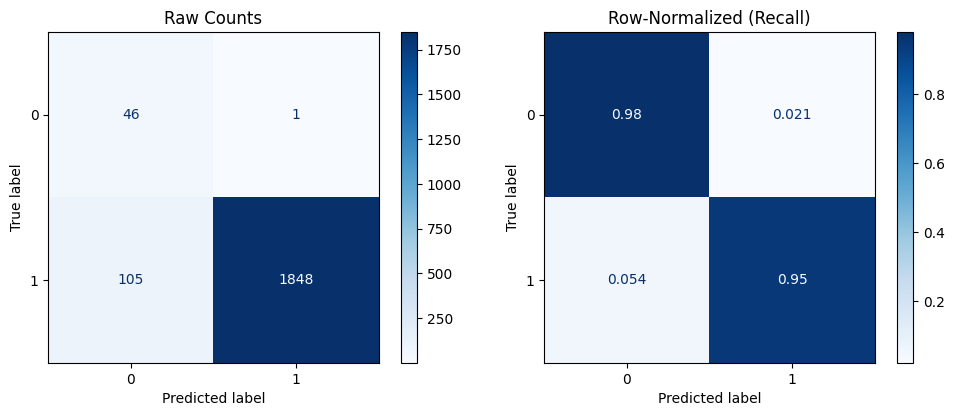

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Raw counts
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=clf.classes_)
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Raw Counts")

# Row‑normalized (true) 
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'),
                               display_labels=clf.classes_)
disp2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Row‑Normalized (Recall)")

plt.tight_layout()
plt.show()


In [147]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# 1. Show raw counts
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix (counts):\n", cm)

# 2. Recompute metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, labels=clf.classes_, average=None))
print("Recall   :", recall_score(y_test, y_pred, labels=clf.classes_, average=None))
print("F1 Score :", f1_score(y_test, y_pred, labels=clf.classes_, average=None))


Confusion matrix (counts):
 [[  46    1]
 [ 105 1848]]
Accuracy : 0.947
Precision: [0.30463576 0.99945917]
Recall   : [0.9787234  0.94623656]
F1 Score : [0.46464646 0.97211994]


## Confusion Matrix: Raw Counts vs. Row‑Normalized

### 1. Raw Counts

The confusion matrix shows the counts of true and false predictions for each class.

```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_counts = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_counts,
                              display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Raw Counts)")
plt.show()
```

Example output:
```
[[  46    1]
 [ 105 1848]]
```
- **Predicted 0 / Predicted 1**
- **Actual 0:** TN = 46, FP = 1
- **Actual 1:** FN = 105, TP = 1848

**Accuracy Calculation:**

\[
\text{Accuracy} = \frac{46 + 1848}{46 + 1 + 105 + 1848} = 0.947
\]

**Precision and Recall:**

- Precision₀ = 46 / (46 + 105) ≈ 0.3046
- Recall₀ = 46 / (46 + 1) ≈ 0.9787
- Precision₁ = 1848 / (1848 + 1) ≈ 0.9995
- Recall₁ = 1848 / (1848 + 105) ≈ 0.9462

---

### 2. Row‑Normalized (Per‑Class Recall)

Row-normalization divides each row by its true-class total, showing the recall for each class.

```python
cm_norm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Row‑Normalized)")
plt.show()
```

Example output:
```
[[0.98   0.021]
 [0.054  0.95 ]]
```
Each row is divided by its true-class total:

- **Class 0:** [46/47, 1/47] ≈ [0.9787, 0.0213] → [0.98, 0.02]
- **Class 1:** [105/1953, 1848/1953] ≈ [0.0538, 0.9462] → [0.054, 0.95]

**Interpretation:**
- 97.9 % of actual 0s were correctly predicted (Recall₀).
- 94.6 % of actual 1s were correctly predicted (Recall₁).

---

### Why Use Normalized Counts?

- **Handles Class Imbalance:** Raw counts can hide poor minority-class performance when one class dominates.
- **Gives Per‑Class Recall:** Row normalization directly shows what fraction of each true class was correctly identified.
- **Easy Comparison:** Percentages let you compare performance on class 0 vs. class 1, regardless of their frequencies.

---

## Understanding Precision, Recall, and F1 Score

- **Precision**: The proportion of correct positive predictions out of all positive predictions made by the model.
- **Recall**: The proportion of actual positives that were correctly identified by the model.
- **F1 Score**: The harmonic mean of precision and recall, balancing both metrics.

---



In [148]:
data['Nutrition_Label'].value_counts(normalize=True)

Nutrition_Label
unhealthy    0.9766
moderate     0.0234
Name: proportion, dtype: float64

Features Importance

In [149]:
clf.coef_


array([[ 0.26961489, -0.03479604, -0.10770601,  2.11011433,  0.08152169,
         1.54665666,  0.11655086,  4.00389818,  0.05462447]])

In [ ]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualizing coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('Feature Importance (Logistic Regression)')
    plt.show()
coef_dict = get_feature_coefs(clf, 0, X.columns)

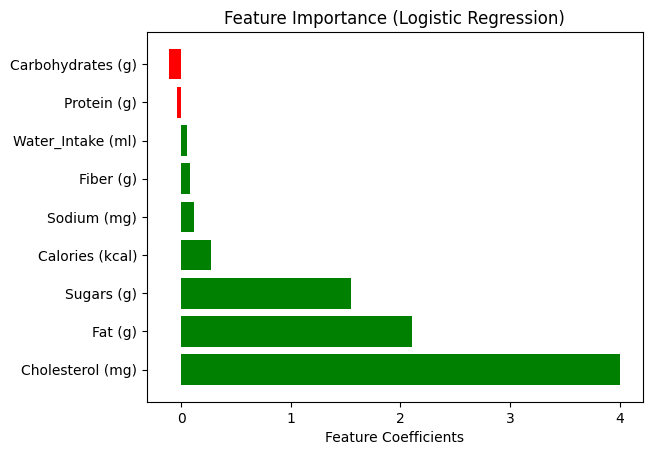

In [ ]:

coef_dict = get_feature_coefs(clf, 0, X.columns)
visualize_coefs(coef_dict)

## Feature Coefficient Visualization

In logistic regression, each feature is assigned a coefficient that represents its influence on the prediction:

- **Positive coefficient**: As the feature value increases, the likelihood of the class increases.
- **Negative coefficient**: As the feature value increases, the likelihood of the class decreases.
- The **magnitude** (absolute value) of the coefficient shows how strongly the feature influences the prediction.

### Why Visualize Coefficients?

- **Interpretability**: See which features are most important for the model's decisions.
- **Direction of Influence**: Understand whether a feature increases or decreases the probability of a class.
- **Feature Selection**: Identify features with little or no impact (coefficients near zero).

### How to Read the Plot

- Each bar represents a feature.
- The length of the bar shows the strength of the influence.
- **Green bars** indicate a positive effect; **red bars** indicate a negative effect.
- Features at the top or bottom have the largest impact on the model’s predictions.


```

**Tip:**  
Use this plot to interpret which features are driving your model's predictions and whether their influence is positive or negative.